In [2]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import requests
import concurrent.futures
from collections import Counter


In [92]:
def exploratory_stats(arrays, array_names):
    stats_list = []
    for idx, array in enumerate(arrays):
        array_name = array_names[idx]
        np_array = np.array(array, dtype=float)  # Ensure the array has a float dtype to handle NaNs

        mean = np.nanmean(np_array).round(2)
        median = np.nanmedian(np_array).round(2)
        min_value = np.nanmin(np_array).round(2)
        max_value = np.nanmax(np_array).round(2)
        std_dev = np.nanstd(np_array).round(2)
        q25 = np.nanpercentile(np_array, 25).round(2)
        q75 = np.nanpercentile(np_array, 75).round(2)

        stats_list.append([array_name, q25,mean,  q75, std_dev,  min_value,median, max_value])

    stats_df = pd.DataFrame(stats_list, columns=['Article Category','1st Quantile', 'Mean',  '3rd Quantile', 'Standard Deviation',  'Min','Median', 'Max'])
    
    return stats_df

In [19]:
whole_dict = {
    'protected': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')
    },
    'excellent': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
    },
    'readworthy': {
        'df':
        pd.read_csv(
            f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv'),
        'titles':
        pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
    },
}


## Plotting on article level

In [15]:
excellent_art = pd.read_csv(f'data/data_files/pipeline_steps/excellent_articles/1_all_articles_fetched.csv')
readworthy_art = pd.read_csv(f'data/data_files/pipeline_steps/readworthy_articles/1_all_articles_fetched.csv')
protected_art = pd.read_csv(f'data/data_files/pipeline_steps/protected_articles/1_all_articles_fetched.csv')
max_len = max(len(excellent_art),len(readworthy_art),len(protected_art))
new_index = np.arange(max_len)

# excellent_art = excellent_art.reindex(new_index)
# protected_art = protected_art.reindex(new_index)

name_list = ['Protected Articles', 'Excellent Articles', 'Readworthy Articles']
category_name_list = ['Protected ', 'Excellent ', 'Readworthy']
char_count_article_df = pd.DataFrame()


### Word Count

In [21]:
for key,value in whole_dict.items():
    whole_dict[key]['word_count'] = np.array(value['df']['sub_texts'].apply(lambda x: len(str(x).split())))
    whole_dict[key]['word_count'] = np.concatenate([
        whole_dict[key]['word_count'],
        np.array([np.nan] * (max_len - len(whole_dict[key]['word_count'])))
    ])


In [80]:
word_count_article_protected = np.array(protected_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_excellent = np.array(excellent_art['sub_texts'].apply(lambda x: len(str(x).split())))
word_count_article_readworthy = np.array(readworthy_art['sub_texts'].apply(
    lambda x: len(str(x).split())))
word_count_article_protected = np.concatenate([word_count_article_protected , np.array([np.nan] * (
    max_len - len(word_count_article_protected)))])
word_count_article_excellent = np.concatenate([word_count_article_excellent , np.array([np.nan] * (
    max_len - len(word_count_article_excellent)))])
word_count_article_readworthy = np.concatenate([word_count_article_readworthy , np.array([np.nan] * (
    max_len - len(word_count_article_readworthy)))])


In [72]:
type(word_count_article_protected)

numpy.ndarray

In [73]:
type([np.nan] * (max_len - len(word_count_article_protected)))


list

In [103]:
ab.to_csv('stats_for_table_articlewordcount.csv',index=False)

In [99]:
ab=exploratory_stats(
    [word_count_article_protected, word_count_article_excellent, word_count_article_readworthy],
    category_name_list)
display(ab)

,Article Category,1st Quantile,Mean,3rd Quantile,Standard Deviation,Min,Median,Max
0,Protected,318.00,2419.74,2997.00,3524.99,1.0,1058.0,33027.0
1,Excellent,2455.50,4946.90,6567.00,3765.82,1.0,4136.0,48436.0
2,Readworthy,1657.75,3480.13,4405.25,2987.06,1.0,2683.5,33027.0


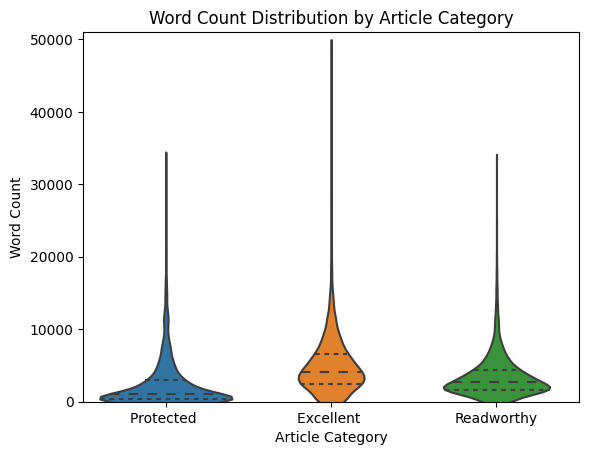

In [104]:
ax = sns.violinplot(data=[
    word_count_article_protected, word_count_article_excellent, word_count_article_readworthy
],
               inner='quartile')

# Set plot title and labels
plt.title('Word Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2], ['Protected ', 'Excellent ', 'Readworthy'])
ax.set_ylim(-1, 51000)
# Show the plot
plt.show()

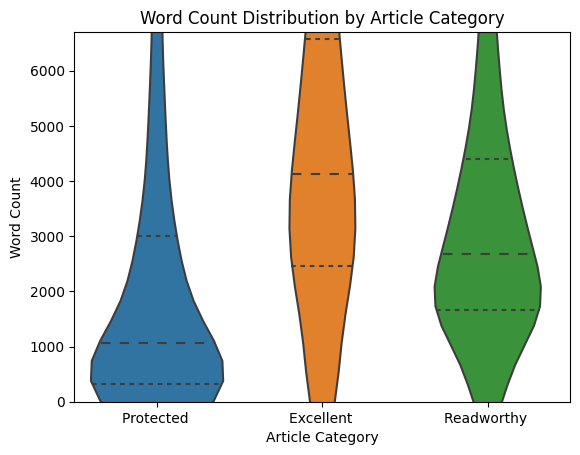

In [106]:
ax = sns.violinplot(data=[word_count_article_protected, word_count_article_excellent, word_count_article_readworthy], inner='quartile')

# Set plot title and labels
plt.title('Word Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2], ['Protected ', 'Excellent ', 'Readworthy '])
ax.set_ylim(-1,6700)
# Show the plot
plt.show()

### Character count

In [108]:
char_count_article_protected = protected_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_excellent = excellent_art['sub_texts'].apply(lambda x: len(str(x)))
char_count_article_readworthy = readworthy_art['sub_texts'].apply(lambda x: len(str(x)))


In [113]:
char_count_article_protected = np.concatenate([
    char_count_article_protected,
    np.array([np.nan] * (max_len - len(char_count_article_protected)))
])
char_count_article_excellent = np.concatenate([
    char_count_article_excellent,
    np.array([np.nan] * (max_len - len(char_count_article_excellent)))
])
char_count_article_readworthy = np.concatenate([
    char_count_article_readworthy,
    np.array([np.nan] * (max_len - len(char_count_article_readworthy)))
])


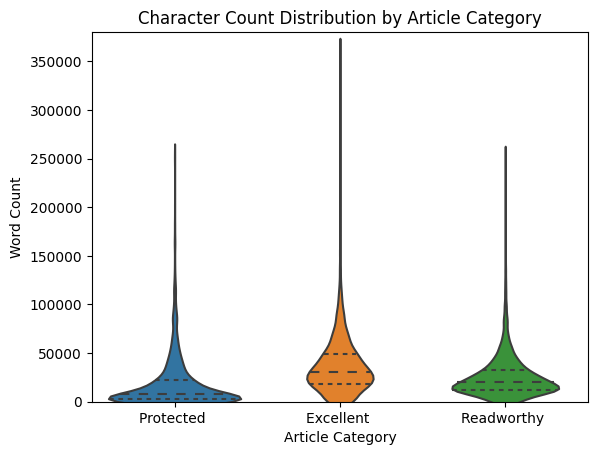

In [129]:
ax = sns.violinplot(data=[
    char_count_article_protected, char_count_article_excellent, char_count_article_readworthy
],
                    inner='quartile')

# Set plot title and labels
plt.title('Character Count Distribution by Article Category')
plt.xlabel('Article Category')
plt.ylabel('Word Count')
plt.xticks([0, 1, 2], ['Protected ', 'Excellent ', 'Readworthy '])
ax.set_ylim(0, 380000)


# Show the plot
plt.show()

In [125]:
protected_charwords=np.nansum(char_count_article_protected)/np.nansum(word_count_article_protected)
excellent_charwords=np.nansum(char_count_article_excellent)/np.nansum(word_count_article_excellent)
readworthy_charwords=np.nansum(char_count_article_readworthy)/np.nansum(word_count_article_readworthy)


In [126]:

print(f"protected: {protected_charwords}, excellent: {excellent_charwords}, readworthy: {readworthy_charwords}")


protected: 7.499377993280236, excellent: 7.447989445864211, readworthy: 7.434205173304958


### Topic Distribution

Topic for 'Angela Merkel': Mensch


In [6]:
excellent_titles = pd.read_csv(
    f'data/data_files/pipeline_steps/excellent_articles/0_excellent_titles.csv')
readworthy_titles = pd.read_csv(
    f'data/data_files/pipeline_steps/readworthy_articles/0_readworthy_titles.csv')
protected_titles = pd.read_csv(
    f'data/data_files/pipeline_steps/protected_articles/0_protected_titles.csv')


In [ ]:
import requests


def get_article_categories(title, lang="de"):
    url = f"https://{lang}.wikipedia.org/w/api.php"

    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "categories",
        "cllimit": "max"
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Extract the page from the query result
    page = list(data["query"]["pages"].values())[0]

    # Check if the page has categories
    if "categories" in page:
        categories = [
            cat["title"][10:] for cat in page["categories"] if cat["title"].startswith("Kategorie")
        ]
        categories_return = [cat for cat in categories if not cat.startswith('Wikipedia:')]
        return categories_return
    else:
        return None


def get_article_topic(title, lang="de"):

    def get_wikidata_id(title, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "sites": f"{lang}wiki",
            "titles": title,
        }
        response = requests.get(url, params=params)
        data = response.json()

        if "entities" in data:
            entities = data["entities"]
            wikidata_id = None
            for entity in entities.values():
                if "id" in entity:
                    wikidata_id = entity["id"]
                    break
            return wikidata_id
        else:
            return None

    def get_label(wikidata_id, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "ids": wikidata_id,
            "props": "labels",
            "languages": lang,
        }
        response = requests.get(url, params=params)
        data = response.json()

        label_data = data["entities"][wikidata_id]["labels"].get(lang)
        if label_data:
            return label_data["value"]
        else:
            return None

    def get_instance_or_subclass(wikidata_id, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "ids": wikidata_id,
            "props": "claims",
            "languages": lang,
        }
        response = requests.get(url, params=params)
        data = response.json()

        instance_claims = data["entities"][wikidata_id]["claims"].get("P31", [])
        subclass_claims = data["entities"][wikidata_id]["claims"].get("P279", [])

        claims = instance_claims + subclass_claims
        if claims:
            claim_id = claims[0]["mainsnak"]["datavalue"]["value"]["id"]
            return get_label(claim_id, lang)
        else:
            return None

    wikidata_id = get_wikidata_id(title, lang)
    if wikidata_id:
        topic = get_instance_or_subclass(wikidata_id, lang)
        return topic
    else:
        return None


# Example usage
title = "Angela Merkel"
topic = get_article_topic(title)
print(f"Topic for '{title}':", topic)


In [42]:
def get_category_topic_counter(title_list):
    category_list=[]
    topic_list=[]
    for title in title_list:
        curr_categories = get_article_categories(title)
        if curr_categories:
            category_list += curr_categories

        curr_topics = get_article_topic(title)
        
        topic_list.append(curr_topics)
    counted_categories = Counter(category_list)
    counted_topics = Counter(topic_list)


    # Convert the Counter object to a list of tuples (string, count)
    categories_result = list(counted_categories.items())
    topic_result = list(counted_topics.items())
    return categories_result, topic_result


In [43]:
import concurrent.futures
from collections import Counter
import requests


def get_article_categories(title, lang="de"):
    url = f"https://{lang}.wikipedia.org/w/api.php"

    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "categories",
        "cllimit": "max"
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Extract the page from the query result
    page = list(data["query"]["pages"].values())[0]

    # Check if the page has categories
    if "categories" in page:
        categories = [
            cat["title"][10:] for cat in page["categories"] if cat["title"].startswith("Kategorie")
        ]
        categories_return = [cat for cat in categories if not cat.startswith('Wikipedia:')]
        return categories_return
    else:
        return None

def get_article_topic(title, lang="de"):

    def get_wikidata_id(title, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "sites": f"{lang}wiki",
            "titles": title,
        }
        response = requests.get(url, params=params)
        data = response.json()

        if "entities" in data:
            entities = data["entities"]
            wikidata_id = None
            for entity in entities.values():
                if "id" in entity:
                    wikidata_id = entity["id"]
                    break
            return wikidata_id
        else:
            return None

    def get_label(wikidata_id, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "ids": wikidata_id,
            "props": "labels",
            "languages": lang,
        }
        response = requests.get(url, params=params)
        data = response.json()

        label_data = data["entities"][wikidata_id]["labels"].get(lang)
        if label_data:
            return label_data["value"]
        else:
            return None

    def get_instance_or_subclass(wikidata_id, lang="de"):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "ids": wikidata_id,
            "props": "claims",
            "languages": lang,
        }
        response = requests.get(url, params=params)
        data = response.json()

        instance_claims = data["entities"][wikidata_id]["claims"].get("P31", [])
        subclass_claims = data["entities"][wikidata_id]["claims"].get("P279", [])

        claims = instance_claims + subclass_claims
        if claims:
            claim_id = claims[0]["mainsnak"]["datavalue"]["value"]["id"]
            return get_label(claim_id, lang)
        else:
            return None

    wikidata_id = get_wikidata_id(title, lang)
    if wikidata_id:
        topic = get_instance_or_subclass(wikidata_id, lang)
        return topic
    else:
        return None


# Example usage
title = "Angela Merkel"
topic = get_article_topic(title)
print(f"Topic for '{title}':", topic)

def process_title(title):
    categories = get_article_categories(title) or []
    topic = get_article_topic(title)
    return categories, topic

def get_category_topic_counter(title_list, max_workers=16):
    category_list = []
    topic_list = []

    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(process_title, title) for title in title_list]

        for future in concurrent.futures.as_completed(futures):
            try:
                categories, topic = future.result()
                category_list += categories
                topic_list.append(topic)
            except Exception as e:
                print(f"An error occurred: {e}")

    counted_categories = Counter(category_list)
    counted_topics = Counter(topic_list)

    # Convert the Counter object to a list of tuples (string, count)
    categories_result = list(counted_categories.items())
    topic_result = list(counted_topics.items())

    # Sort the results by counts in descending order
    categories_result.sort(key=lambda x: x[1], reverse=True)
    topic_result.sort(key=lambda x: x[1], reverse=True)

    return categories_result, topic_result


# Usage:
title_list = excellent_titles['title'].iloc[0:50]  # Your list of titles
categories_result, topic_result = get_category_topic_counter(title_list)


Topic for 'Angela Merkel': Mensch


In [9]:
exec_categories_result, exec_topic_result = get_category_topic_counter(excellent_titles['title'])

In [10]:
read_categories_result, read_topic_result = get_category_topic_counter(readworthy_titles['title'])

In [11]:
prot_categories_result, prot_topic_result = get_category_topic_counter(protected_titles['title'])

In [50]:
for key,item in whole_dict.items():
    print(item)
    cat,top = get_category_topic_counter(item['titles']['title'])
    whole_dict[key]['category_counter']=cat
    whole_dict[key]['topic_counter']=top


{'df':       Unnamed: 0                          title   bytes   
0              0                     Rudolf Heß   86509  \
1              1                           Popo     805   
2              2                         Kanake     309   
3              3                          Bitch    5369   
4              4                        Fisting    7432   
...          ...                            ...     ...   
2840        2840  Marie-Agnes Strack-Zimmermann   28388   
2841        2841                     Mike Tyson   83016   
2842        2842                       Toilette   51005   
2843        2843                    Braunwasser    1238   
2844        2844                   Zirkumzision  223530   

                                              sub_texts  
0     Rudolf Walter Richard Heß [] (* 26 April== 189...  
1                              Popo ist \nSiehe auch:\n  
2                    Kanake steht für:\n\nSiehe auch:\n  
3     Bitch  ist ein Begriff aus dem Englischen, der

In [54]:
for key,item in whole_dict.items():
    whole_dict[key]['category_counter'] = pd.DataFrame(whole_dict[key]['category_counter'],
                                                       columns=['category', 'size'])
    whole_dict[key]['category_counter']['share'] = whole_dict[key]['category_counter']['size'] / len(whole_dict[key]['category_counter'])
    whole_dict[key]['category_counter']['category_counter origin']=key

    whole_dict[key]['topic_counter'] = pd.DataFrame(whole_dict[key]['topic_counter'],
                                                    columns=['category', 'size'])
    whole_dict[key]['topic_counter']['share'] = whole_dict[key]['topic_counter']['size'] / len(
        whole_dict[key]['topic_counter'])
    whole_dict[key]['topic_counter']['article origin'] = key


In [56]:
for key,item in whole_dict.items():
    display(whole_dict[key]['category_counter'].head(10))
    display(whole_dict[key]['category_counter'].head(25))

,category,size,share,category_counter origin
0,Mann,488,0.057486,protected
1,Deutscher,301,0.035458,protected
2,Frau,119,0.014018,protected
3,Begriffsklärung,114,0.013429,protected
4,Autor,85,0.010013,protected
5,Pseudonym,71,0.008364,protected
6,Filmschauspieler,70,0.008246,protected
7,US-Amerikaner,69,0.008128,protected
8,Literatur (Deutsch),66,0.007775,protected
9,Person als Namensgeber für einen Asteroiden,64,0.007539,protected


,category,size,share,category_counter origin
0,Mann,488,0.057486,protected
1,Deutscher,301,0.035458,protected
2,Frau,119,0.014018,protected
3,Begriffsklärung,114,0.013429,protected
4,Autor,85,0.010013,protected
5,Pseudonym,71,0.008364,protected
6,Filmschauspieler,70,0.008246,protected
7,US-Amerikaner,69,0.008128,protected
8,Literatur (Deutsch),66,0.007775,protected
9,Person als Namensgeber für einen Asteroiden,64,0.007539,protected


,category,size,share,category_counter origin
0,Mann,431,0.038558,excellent
1,Deutscher,138,0.012346,excellent
2,Autor,84,0.007515,excellent
3,Person als Namensgeber für einen Asteroiden,83,0.007425,excellent
4,US-Amerikaner,75,0.006710,excellent
5,Literatur (20. Jahrhundert),66,0.005904,excellent
6,Literatur (Deutsch),64,0.005726,excellent
7,Frau,50,0.004473,excellent
8,Literarisches Werk,50,0.004473,excellent
9,Disposition einer Orgel,38,0.003400,excellent


,category,size,share,category_counter origin
0,Mann,431,0.038558,excellent
1,Deutscher,138,0.012346,excellent
2,Autor,84,0.007515,excellent
3,Person als Namensgeber für einen Asteroiden,83,0.007425,excellent
4,US-Amerikaner,75,0.006710,excellent
5,Literatur (20. Jahrhundert),66,0.005904,excellent
6,Literatur (Deutsch),64,0.005726,excellent
7,Frau,50,0.004473,excellent
8,Literarisches Werk,50,0.004473,excellent
9,Disposition einer Orgel,38,0.003400,excellent


,category,size,share,category_counter origin
0,Mann,597,0.035648,readworthy
1,Deutscher,234,0.013973,readworthy
2,Frau,127,0.007583,readworthy
3,Autor,112,0.006688,readworthy
4,US-Amerikaner,99,0.005912,readworthy
5,Kirchengebäude in Europa,75,0.004478,readworthy
6,Person als Namensgeber für einen Asteroiden,71,0.004240,readworthy
7,Literatur (Deutsch),68,0.004060,readworthy
8,Disposition einer Orgel,68,0.004060,readworthy
9,Literatur (20. Jahrhundert),62,0.003702,readworthy


,category,size,share,category_counter origin
0,Mann,597,0.035648,readworthy
1,Deutscher,234,0.013973,readworthy
2,Frau,127,0.007583,readworthy
3,Autor,112,0.006688,readworthy
4,US-Amerikaner,99,0.005912,readworthy
5,Kirchengebäude in Europa,75,0.004478,readworthy
6,Person als Namensgeber für einen Asteroiden,71,0.004240,readworthy
7,Literatur (Deutsch),68,0.004060,readworthy
8,Disposition einer Orgel,68,0.004060,readworthy
9,Literatur (20. Jahrhundert),62,0.003702,readworthy


In [12]:
# Convert the lists of tuples to DataFrames and add the 'article origin' column
cat_exec_df = pd.DataFrame(exec_categories_result, columns=['category', 'size'])
cat_exec_df['article origin'] = 'excellent'
cat_exec_df['share'] = cat_exec_df['size'] / len(cat_exec_df)
cat_read_df = pd.DataFrame(read_categories_result, columns=['category', 'size'])
cat_read_df['article origin'] = 'readworthy'
cat_read_df['share'] = cat_read_df['size'] / len(cat_read_df)
cat_prot_df = pd.DataFrame(prot_categories_result, columns=['category', 'size'])
cat_prot_df['article origin'] = 'protected'
cat_prot_df['share'] = cat_prot_df['size'] / len(cat_prot_df)
# Concatenate the three DataFrames
all_cats_df = pd.concat([cat_exec_df, cat_read_df, cat_prot_df], ignore_index=True)

In [28]:
cat_exec_df = cat_exec_df.sort_values(by='share', ascending=False)

# Get the top 10 rows with the highest 'share' values
top_10_df = cat_exec_df.head(10)

# Group the remaining rows and sum their 'share' values
other_share = cat_exec_df.iloc[10:]['share'].sum()

# Create a new row with the category 'Other' and the calculated sum of 'share' values
# other_row = pd.DataFrame()
# other_row['category']= 'Other', 
# other_row['share']= other_share

# # Append the new row to the top 10 DataFrame
# result_df = pd.concat([top_10_df,other_row,])


In [40]:
top_prot_df.head(10)

NameError: name 'top_prot_df' is not defined

In [38]:
cat_prot_df.head(10)

,category,size,article origin,share
0,Mann,488,protected,0.057486
1,Deutscher,301,protected,0.035458
2,Frau,119,protected,0.014018
3,Begriffsklärung,114,protected,0.013429
4,Autor,85,protected,0.010013
5,Pseudonym,71,protected,0.008364
6,Filmschauspieler,70,protected,0.008246
7,US-Amerikaner,69,protected,0.008128
8,Literatur (Deutsch),66,protected,0.007775
9,Person als Namensgeber für einen Asteroiden,64,protected,0.007539


In [37]:
cat_read_df.head(10)

,category,size,article origin,share
0,Mann,597,readworthy,0.035648
1,Deutscher,234,readworthy,0.013973
2,Frau,127,readworthy,0.007583
3,Autor,112,readworthy,0.006688
4,US-Amerikaner,99,readworthy,0.005912
5,Kirchengebäude in Europa,75,readworthy,0.004478
6,Person als Namensgeber für einen Asteroiden,71,readworthy,0.004240
7,Literatur (Deutsch),68,readworthy,0.004060
8,Disposition einer Orgel,68,readworthy,0.004060
9,Literatur (20. Jahrhundert),62,readworthy,0.003702


In [36]:
cat_exec_df.head(10)

,category,size,article origin,share
0,Mann,431,excellent,0.038558
1,Deutscher,138,excellent,0.012346
2,Autor,84,excellent,0.007515
3,Person als Namensgeber für einen Asteroiden,83,excellent,0.007425
4,US-Amerikaner,75,excellent,0.006710
5,Literatur (20. Jahrhundert),66,excellent,0.005904
6,Literatur (Deutsch),64,excellent,0.005726
7,Frau,50,excellent,0.004473
8,Literarisches Werk,50,excellent,0.004473
9,Disposition einer Orgel,38,excellent,0.003400


<Axes: xlabel='category', ylabel='share'>

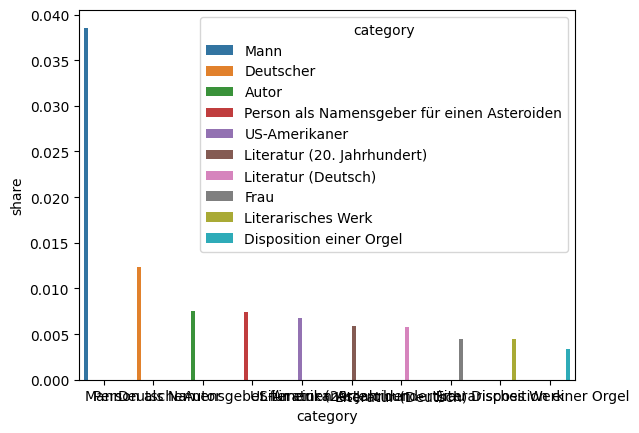

In [33]:
sns.barplot(data=top_10_df, x='category',y="share", hue="category")


TypeError: 'NoneType' object is not iterable

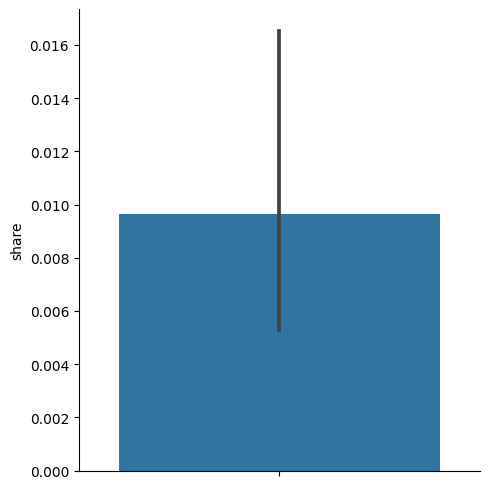

In [31]:
sns.catplot(data=top_10_df, y="share", hue="category", kind="bar")

In [13]:
# Convert the lists of tuples to DataFrames and add the 'article origin' column
exec_df = pd.DataFrame(exec_topic_result, columns=['category', 'size','share'])
exec_df['article origin'] = 'excellent'

read_df = pd.DataFrame(read_topic_result, columns=['category', 'size','share'])
read_df['article origin'] = 'readworthy'

prot_df = pd.DataFrame(prot_topic_result, columns=['category', 'size','share'])
prot_df['article origin'] = 'protected'

# Concatenate the three DataFrames
all_topics_df = pd.concat([exec_df, read_df, prot_df], ignore_index=True)

ValueError: 3 columns passed, passed data had 2 columns

In [25]:
all_cats_df.to_csv('all_categories_count.csv',index=False)
all_topics_df.to_csv('all_topics_count.csv',index=False)

## comparison of readworthy & execellent

In [29]:
cats_exc,top_exc = get_category_topic_counter(excellent_titles['title'])



Fetching topic for 'Almsee'
Fetching topic for 'Altausseer See'
Fetching topic for 'Amper'
Fetching topic for 'Blabbergraben'
Fetching topic for 'Bäke (Telte)'
Fetching topic for 'Bullengraben'
Fetching topic for 'Dornbirner Ach'
Fetching topic for 'Elbe'
Fetching topic for 'Elsterwerda-Grödel-Floßkanal'
Fetching topic for 'Europäisches Nordmeer'
Fetching topic for 'Grundlsee (See)'
Fetching topic for 'Große Dhünntalsperre'
Fetching topic for 'Hochwasser in Würzburg'
Fetching topic for 'Hochwasserrückhaltebecken Jonenbach'
Fetching topic for 'Hochwasserschutz in Dresden'
Fetching topic for 'Isar'
Fetching topic for 'Main'
Fetching topic for 'Ludwig-Donau-Main-Kanal'
Fetching topic for 'Moälven'
Fetching topic for 'Mono Lake'
Fetching topic for 'Nationalpark Schleswig-Holsteinisches Wattenmeer'
Fetching topic for 'Oderteich'
Fetching topic for 'Osterseen'
Fetching topic for 'Parsteiner See'
Fetching topic for 'Pegel Würzburg'
Fetching topic for 'Ragöse'
Fetching topic for 'Schermützelse

In [46]:
from collections import defaultdict


def categorize_articles(titles, lang="de"):
    def get_instance_or_subclass(wikidata_id, lang):
        url = "https://www.wikidata.org/w/api.php"
        params = {
            "action": "wbgetentities",
            "format": "json",
            "ids": wikidata_id,
            "props": "claims",
            "languages": lang,
        }
        response = requests.get(url, params=params)
        data = response.json()

        if "error" in data:
            return None

        instance_claims = data["entities"][wikidata_id]["claims"].get("P31", [])
        subclass_claims = data["entities"][wikidata_id]["claims"].get("P279", [])
        print(instance_claims)
        
        if not instance_claims and not subclass_claims:
            return None

        if instance_claims:
            instance_id = instance_claims[0]["mainsnak"]["datavalue"]["value"]["id"]
            return get_label(instance_id, lang)
        else:
            subclass_id = subclass_claims[0]["mainsnak"]["datavalue"]["value"]["id"]
            return get_label(subclass_id, lang)



    def get_category_for_topic(topic):
        category_map = {
            "human": ["Q5"],  # Human
            "taxon": ["Q16521"],  # Taxon
            "administrative territorial entity": ["Q56061"],  # Administrative territorial entity
            "architectural structure": ["Q811979"],  # Architectural structure
            "occurrence": ["Q1190554"],  # Occurrence
            "chemical compound": ["Q11173"],  # Chemical compound
            "film": ["Q11424"],  # Film
            "thoroughfare": ["Q83620"],  # Thoroughfare
            "astronomical object": ["Q6999"],  # Astronomical object
            "Wikimedia list article": ["Q13406463"],  # Wikimedia list article
            "Wikimedia disambiguation page": ["Q4167410"],  # Wikimedia disambiguation page
            "artificial entity": ["Q16686448"],  # Artificial entity
        }
        for category, topic_ids in category_map.items():
            if topic in topic_ids:
                return category
        print(topic)
        return "other"

    def find_matching_category(topic_id, lang="de"):
        current_id = topic_id
        while current_id is not None:
            category = get_category_for_topic(current_id)
            if category != "other":
                return category
            else:
                current_id = get_instance_or_subclass(current_id, lang)

        return "other"

    topic_counts = defaultdict(int)
    total_articles = len(titles)
    
    for title in titles:
        highest_level_topic = get_article_topic(title, lang)
        category = find_matching_category(highest_level_topic, lang)
        topic_counts[category] += 1

    topic_percentages = {
        category: (count / total_articles) * 100
        for category, count in topic_counts.items()
    }

    return topic_percentages


# Example usage
titles = ["Berlin", "Python (programming language)", "Mona Lisa", "The Shawshank Redemption"]
categories = categorize_articles(excellent_titles['title'].iloc[0:25])
for category, percentage in categories.items():
    print(f"{category}: {percentage:.1f}%")


See
See
Fluss
Fluss
Bach
Wassergraben
Fluss
Fluss
Floßgraben
Randmeer
Talsperre
See
Bauwerk
Hochwasserschutz
Fluss
Kanal
Fluss
Fluss
Endsee
Nationalpark in Deutschland
Stausee
Geotop
See
Pegel
other: 100.0%


In [149]:
for title in excellent_titles['title']:
    a = get_article_topic(title)
    print(f"{title} is in category: {a}")

Almsee is in category: See
Altausseer See is in category: See
Amper is in category: Fluss
Bäke (Telte) is in category: Fluss
Blabbergraben is in category: Bach
Bullengraben is in category: Wassergraben
Dornbirner Ach is in category: Fluss


KeyboardInterrupt: 

In [46]:
import requests


def get_highest_level_categories(title, lang='de'):
    S = requests.Session()
    URL = f"https://{lang}.wikipedia.org/w/api.php"

    def get_categories(title, main_category=None):
        params = {
            "action": "query",
            "format": "json",
            "prop": "categories",
            "titles": title,
            "cllimit": "max",
        }

        if main_category:
            params["clcategories"] = main_category
        # print(params)
        # print(main_category)
        response = S.get(url=URL, params=params)
        data = response.json()
        print(data)
        categories = []
        for _, v in data["query"]["pages"].items():
            if "categories" in v:
                for category_info in v["categories"]:
                    category = category_info["title"]
                    categories.append(category)

        return categories

    categories = get_categories(title)
    highest_level_categories = []

    for category in categories:
        subcategories = get_categories(category)
        is_highest_level = True
        for subcategory in subcategories:
            if subcategory.startswith("Kategorie:Kategorie:"):
                is_highest_level = False
                break
        if is_highest_level:
            highest_level_categories.append(category)

    return highest_level_categories


# Example usage:
german_title = "Berlin"
result = get_highest_level_categories(german_title)
print(result)


{'batchcomplete': '', 'query': {'pages': {'2552494': {'pageid': 2552494, 'ns': 0, 'title': 'Berlin', 'categories': [{'ns': 14, 'title': 'Kategorie:Berlin'}, {'ns': 14, 'title': 'Kategorie:Bundesland (Deutschland)'}, {'ns': 14, 'title': 'Kategorie:Deutsche Hauptstadt'}, {'ns': 14, 'title': 'Kategorie:Deutsche Landeshauptstadt'}, {'ns': 14, 'title': 'Kategorie:Deutsche Universitätsstadt'}, {'ns': 14, 'title': 'Kategorie:Deutscher Ortsname slawischer Herkunft'}, {'ns': 14, 'title': 'Kategorie:Ehemalige Kreisstadt'}, {'ns': 14, 'title': 'Kategorie:Ersterwähnung 1244'}, {'ns': 14, 'title': 'Kategorie:Gemeinde in Deutschland'}, {'ns': 14, 'title': 'Kategorie:Hansestadt'}, {'ns': 14, 'title': 'Kategorie:Hauptstadt in Europa'}, {'ns': 14, 'title': 'Kategorie:Hauptstadt in der EU'}, {'ns': 14, 'title': 'Kategorie:Kreisfreie Stadt in Deutschland'}, {'ns': 14, 'title': 'Kategorie:Millionenstadt'}, {'ns': 14, 'title': 'Kategorie:Ort an der Spree'}, {'ns': 14, 'title': 'Kategorie:Ort in Berlin'}, {

In [1]:
def get_wikipedia_categories(title):
    url = "https://en.wikipedia.org/w/api.php"

    params = {
        "action": "query",
        "format": "json",
        "titles": title,
        "prop": "categories",
        "clshow": "!hidden",  # Exclude hidden categories
        "cllimit": "max"  # Get all categories
    }

    response = requests.get(url, params=params)
    data = response.json()

    # Extract page data
    page = data["query"]["pages"]
    page_id = list(page.keys())[0]

    # Extract categories
    categories = [cat["title"] for cat in page[page_id].get("categories", [])]
    return categories


# Example usage
title = "Python (programming language)"
categories = get_wikipedia_categories(title)

for category in categories:
    print(category)

NameError: name 'requests' is not defined

In [ ]:
second_relevant_topic = [
    'Kategorie:Räumliche Systematik', 'Kategorie:Sachsystematik', 'Kategorie:Zeitliche Semantik'
]


In [45]:
def get_categories(title):
    S = requests.Session()
    URL = f"https://de.wikipedia.org/w/api.php"
    params = {"action": "query", "format": "json", "prop": "categories", "titles": title}
    response = S.get(url=URL, params=params)
    data = response.json()
    categories_titles = [
        category['title'] for page_key in data['query']['pages']
        for category in data['query']['pages'][page_key]['categories']
        if category['title'].startswith('Kategorie:')
    ]
    print(categories_titles)

    return categories_titles



In [41]:
third_level_cats=[]
article_name='Berlin'

def get_3rd_level_hierarchy(category):

    initial_cateogries = get_categories('Berlin')

    







{'pages': {'2552494': {'pageid': 2552494,
   'ns': 0,
   'title': 'Berlin',
   'categories': [{'ns': 14, 'title': 'Kategorie:Berlin'},
    {'ns': 14, 'title': 'Kategorie:Bundesland (Deutschland)'},
    {'ns': 14, 'title': 'Kategorie:Deutsche Hauptstadt'},
    {'ns': 14, 'title': 'Kategorie:Deutsche Landeshauptstadt'},
    {'ns': 14, 'title': 'Kategorie:Deutsche Universitätsstadt'},
    {'ns': 14, 'title': 'Kategorie:Deutscher Ortsname slawischer Herkunft'},
    {'ns': 14, 'title': 'Kategorie:Ehemalige Kreisstadt'},
    {'ns': 14, 'title': 'Kategorie:Ersterwähnung 1244'},
    {'ns': 14, 'title': 'Kategorie:Gemeinde in Deutschland'},
    {'ns': 14, 'title': 'Kategorie:Hansestadt'}]}}}

In [42]:
categories_titles = [
    category['title'] for page_key in data['query']['pages']
    for category in data['query']['pages'][page_key]['categories']
    if category['title'].startswith('Kategorie:')
]
print(categories_titles)

['Kategorie:Berlin', 'Kategorie:Bundesland (Deutschland)', 'Kategorie:Deutsche Hauptstadt', 'Kategorie:Deutsche Landeshauptstadt', 'Kategorie:Deutsche Universitätsstadt', 'Kategorie:Deutscher Ortsname slawischer Herkunft', 'Kategorie:Ehemalige Kreisstadt', 'Kategorie:Ersterwähnung 1244', 'Kategorie:Gemeinde in Deutschland', 'Kategorie:Hansestadt']


In [142]:

get_article_categories("Berlin")


['Berlin',
 'Bundesland (Deutschland)',
 'Deutsche Hauptstadt',
 'Deutsche Landeshauptstadt',
 'Deutsche Universitätsstadt',
 'Deutscher Ortsname slawischer Herkunft',
 'Ehemalige Kreisstadt',
 'Ersterwähnung 1244',
 'Gemeinde in Deutschland',
 'Hansestadt',
 'Hauptstadt in Europa',
 'Hauptstadt in der EU',
 'Kreisfreie Stadt in Deutschland',
 'Millionenstadt',
 'Ort an der Spree',
 'Ort in Berlin',
 'Ort mit Binnenhafen',
 'Stadt als Namensgeber für einen Asteroiden',
 'Stadt in Deutschland',
 'Wikipedia:Artikel mit Video',
 'Wikipedia:Defekte Weblinks/Ungeprüfte Archivlinks 2023-03',
 'Wikipedia:Gesprochener Artikel',
 'Wikipedia:Lesenswert',
 'Wikipedia:Veraltet in drei bis vier Jahren',
 'Wikipedia:Weblink offline']